<a href="https://colab.research.google.com/github/RishitParija/ML/blob/main/NUMBER_PLATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 20.3 MB/s eta 0:00:00


In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


## READING IMAGES ANG GRAYSCALING THEM

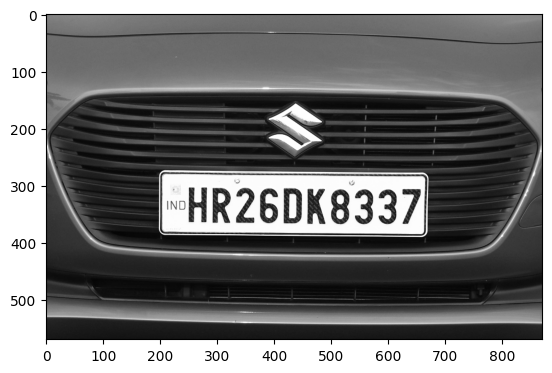

In [20]:
img=cv2.imread('/content/download (22).jpeg')
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

## APPLYING FILTER AND FINDING EDGES FOR LOCALIZATION

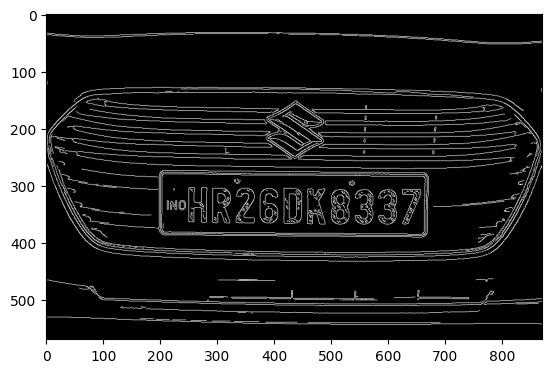

In [21]:
bfilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

## FINDING CONTOURS AND APPLYING MASKS

In [22]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours= sorted(contours,key=cv2.contourArea,reverse=True)[:10]


In [23]:
location =None
for contour in contours:
  approx=cv2.approx = cv2.approxPolyDP(contour,8,True)
  if len(approx)==4:#CHECKING IF THE CONTOUR HAS 4 KEY POINTS
    location = approx
    break



In [24]:
location

array([[[203, 284]],

       [[661, 284]],

       [[663, 381]],

       [[207, 382]]], dtype=int32)

In [25]:
#ISOLATING THE NUMBER PLATE SECTION BY MASKING
mask=np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask, [location],0,255,-1)
new_image =cv2.bitwise_and(img,img,mask=mask)

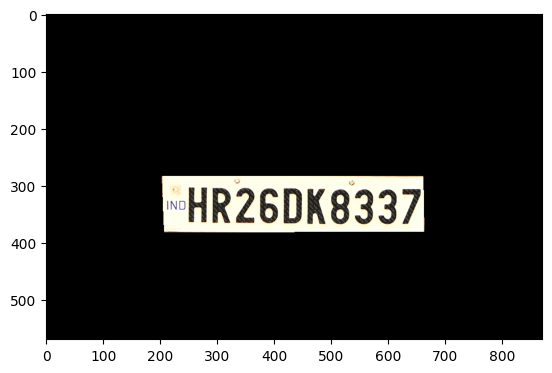

In [26]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [27]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

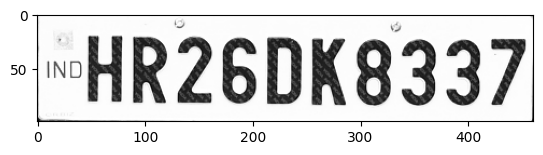

In [28]:


plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))



## EASY OCR FOR TEXT EXTRACTION

In [29]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[4, 38], [50, 38], [50, 64], [4, 64]], 'IND;', 0.33451828360557556),
 ([[38, 7], [461, 7], [461, 99], [38, 99]], 'HRZSDK8337', 0.5053763716381341)]

## RESULT

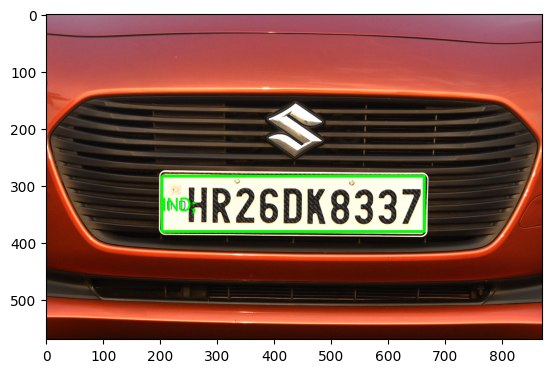

In [30]:

text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

